In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt



# Introduction

# Hypothesis Testing Methodology

In hypothesis testing a decision between two alternatives, one of which is called the null hypothesis and the other the alternative hypothesis, must be made. As an example, suppose you are asked to decide whether a coin is fair or biased in favor of heads. In this situation the statement that the coin is fair is the null hypothesis while the statement that the coin is biased in favor of heads is the alternative hypothesis. To make the decision an experiment is performed. For example, the experiment might consist of tossing the coin 10 times, and on the basis of the 10 coin outcomes, you would make a decision either to accept the null hypothesis or reject the null hypothesis (and therefore accept the alternative hypothesis). So, in hypothesis testing acceptance or rejection of the null hypothesis can be based on a decision rule. As an example of a decision rule, you might decide to reject the null hypothesis and accept the alternative hypothesis if 8 or more heads occur in 10 tosses of the coin.





1.   State the Null Hypothesis and the Alternative Hypothesis
2.   Set $α$
3.   Conduct experiment and collect data
4.   Calculate test statistic
5.   Set rejection / acceptance criteria
6.   Make a conclusion




## Critical Value / Rejection Area method of P-value method

Hypothesis testing can take one of 2 routes. Either you set a test statistic and measure it against a rejection region i.e. if the observed test statistic is within the rejection region, reject the $H_0$.
Alternatively, we can calculate the probability of observing a test statistic, even more extreme, assuming $H_0$ is correct and compare this to our set $α$ , *significance level*.

# Errors
In the jury trial there are two types of errors: (1) the person is innocent but the jury finds the person guilty, and (2) the person is guilty but the jury declares the person to be innocent. In our system of justice, the first error is considered more serious than the second error.  These two errors along with the correct decisions are shown in the next table where the jury decision is shown in bold on the left margin and the true state of affairs is shown in bold along the top margin of the table.


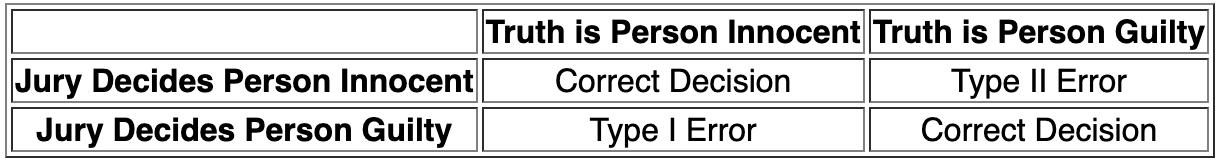

With respect to hypothesis testing the two errors that can occur are: (1) the null hypothesis is true but the decision based on the testing process is that the null hypothesis should be rejected, and (2) the null hypothesis is false but the testing process concludes that it should be accepted. These two errors are called Type I and Type II errors. As in the jury trial situation, a Type I error is usually considered more serious than a Type II error. The probability of a Type I error is denoted by the Greek letter alpha and is also called the significance level of the test, while the probability of a Type II error is denoted by the Greek letter beta.  The next table is analogous to the previous table with the decision reached in hypothesis testing shown in bold along the left margin and the true situation shown in bold along the top margin of the table.


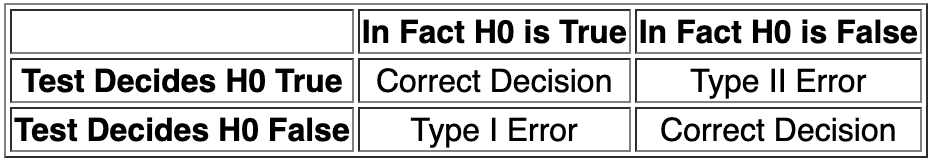

## Assumptions

In a jury trial the person accused of the crime is assumed innocent at the beginning of the trial, and unless the jury can find overwhelming evidence to the contrary, should be judged innocent at the end of the trial. Likewise, in hypothesis testing, the null hypothesis is assumed to be true, and unless the test shows overwhelming evidence that the null hypothesis is not true, the null hypothesis is accepted.


# Example of a Coin Toss

Suppose that you are trying to decide whether a coin is fair or biased in favor of heads. The null hypothesis is H0: the coin is fair (i.e., the probability of a head is 0.5), and the alternative hypothesis is Ha: the coin is biased in favor of a head (i.e. the probability of a head is greater than 0.5). To make this problem easier, assume that the alternative hypothesis is Ha: the probability of a head is 0.7. You are allowed to toss the coin only 10 times, and on the basis of the outcomes, make your decision.


$$
    \begin{gather}
        H_0: p_{0} = 0.5 \\
        H_1: p_{0} ≥ 0.7
    \end{gather}
$$


The next graphs show Type I and Type II errors made in testing a null hypothesis of the form H0:p=p0 against H1:p=p1 where p1>p0. In these graphs n is taken to be 10. The red outlined bars show the probability distribution of the number of heads under the assumption that the null hypothesis (fair coin or p=0.5) is true, while the blue shaded bars show the probability distribution of the number of heads under the assumption that the null hypothesis is false (and p=0.7). The decision rule is based on a critical value--if the number of heads is greater than or equal to this critical value, the null hypothesis is rejected--otherwise the null hypothesis is accepted. At the top of each graph you find the null, H0, and alternative, Ha, hypotheses, the critical value (CV) ranging from 6 to 10, Alpha, the probability of a Type I error, and Beta, the probability of a Type II error.  These errors are show by the red and blue shadings, respectively.


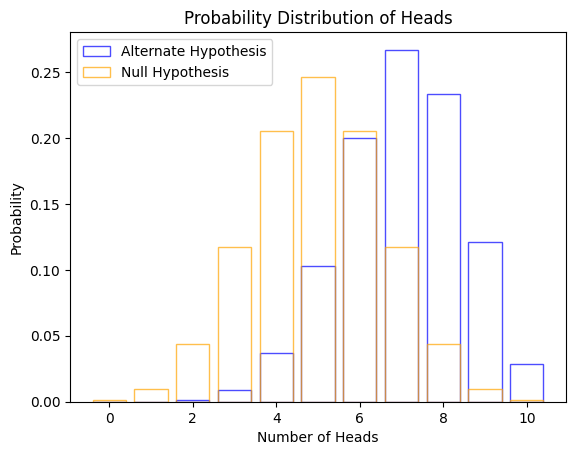

In [3]:
# setting the values for the binomial distribution
# of n and p
n = 10
p0 = 0.5
p1 = 0.7
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist0 = [binom.pmf(r, n, p0) for r in r_values ]
dist1 = [binom.pmf(r, n, p1) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist1, label="Alternate Hypothesis", alpha=0.7, facecolor="none", edgecolor='blue')
plt.bar(r_values, dist0, label="Null Hypothesis", alpha=0.7, facecolor="none", edgecolor='orange')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution of Heads')
plt.legend()
plt.show()

## What is the alpha and the Beta?

The alpha here is, *under the assumption the null is true*, the probability of rejecting the null. This will happen if in the experiment, I toss anything greater than  6 heads. This will include 6, 7, 8, 9 and 10 heads.
It is improbable but not impossible, hence there is a small chance I will make a Type-I error.

Text(0.5, 1.0, 'Probability Distribution of Heads')

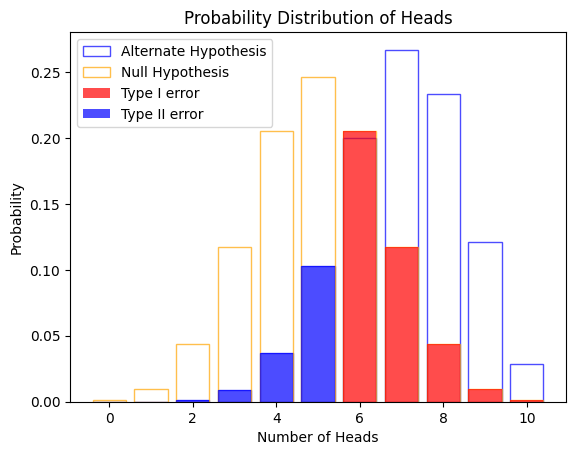

In [4]:
critical_value = 6
critical_value_range = list(range(critical_value,n+1))
critical_value_range_beta = list(range(critical_value))
critical_values_pmf_h0 = [binom.pmf(r, n, p0) for r in critical_value_range]
critical_values_pmf_h1 = [binom.pmf(r, n, p1) for r in critical_value_range_beta]
plt.bar(r_values, dist1, label="Alternate Hypothesis", alpha=0.7, facecolor="none", edgecolor='blue')
plt.bar(r_values, dist0, label="Null Hypothesis", alpha=0.7, facecolor="none", edgecolor='orange')
plt.bar(critical_value_range, critical_values_pmf_h0, label="Type I error", alpha=0.7, color = 'red')
plt.bar(critical_value_range_beta, critical_values_pmf_h1, label="Type II error", alpha=0.7, color = 'blue')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()
plt.title('Probability Distribution of Heads')

In [5]:
binom.pmf(6, 10, 0.5) + binom.pmf(7, 10, 0.5) + binom.pmf(8, 10, 0.5) + binom.pmf(9, 10, 0.5) + binom.pmf(10, 10, 0.5)

0.37695312499999994

In [6]:
print(binom.cdf(5,10,0.5)) # ~ this is like saying P(X<=5)
print(1-binom.cdf(5,10,0.5))  # ~ this is like saying P(X>5)

0.623046875
0.376953125


In [7]:
print(binom.cdf(5,10,0.7))  # ~ this is like saying P(X<=5)

0.15026833260000005


In [8]:
def calc_alpha(n,p0,critical_value):
  '''
  n: number of trials
  p0: probability of success in the null hypothesis
  cv: critical value
  '''
  return 1-binom.cdf(critical_value-1, n, p0)

## What is Beta?

We accept (Read this as do not reject) $H_0$ when it is indeed false. These are all the values below the critical value and the probability of getting them under the true $H_1$.


In [9]:
def calc_beta(n,p1,critical_value):
  '''
  n: number of trials
  p1: probability of success in the alternative hypothesis
  cv: critical value
  '''
  return binom.cdf(critical_value-1, n, p1)

In [12]:
def plot_experiment(n,p0,p1,critical_value,ax,legend_off=True):
  '''
  n: number of trials
  p0: probability of success in the null hypothesis
  p1: probability of success in the alternative hypothesis
  cv: critical value
  '''

  # defining list of r values
  r_values = list(range(n + 1))
  # list of pmf values
  dist0 = [binom.pmf(r, n, p0) for r in r_values ]
  dist1 = [binom.pmf(r, n, p1) for r in r_values ]

  # Setting up alpha and beta

  critical_value_range = list(range(critical_value,n+1))
  critical_value_range_beta = list(range(critical_value))
  critical_values_pmf_h0 = [binom.pmf(r, n, p0) for r in critical_value_range]
  critical_values_pmf_h1 = [binom.pmf(r, n, p1) for r in critical_value_range_beta]


  # plotting the graph
  ax.bar(r_values, dist1, label="Alternative Hypothesis", alpha=0.7, facecolor="none", edgecolor='blue')
  ax.bar(r_values, dist0, label="Null Hypothesis", alpha=0.7, facecolor="none", edgecolor='orange')
  ax.bar(critical_value_range, critical_values_pmf_h0, label="Type I error", alpha=0.7, color = 'red')
  ax.bar(critical_value_range_beta, critical_values_pmf_h1, label="Type II error", alpha=0.7, color = 'blue')
  ax.annotate("alpha: {:.3f}".format(calc_alpha(n,p0,critical_value)),(0.8*n,max(dist0)))
  ax.annotate("beta: {:.3f}".format(calc_beta(n,p1,critical_value)),(0.8*n,max(dist0)-0.02))
  ax.set_xlabel('Number of Heads')
  ax.set_ylabel('Probability')
  ax.set_title('Probability Distribution of Heads')
  if legend_off:
    ax.legend().set_visible(False)
  else:
    ax.legend()
  #ax.show()

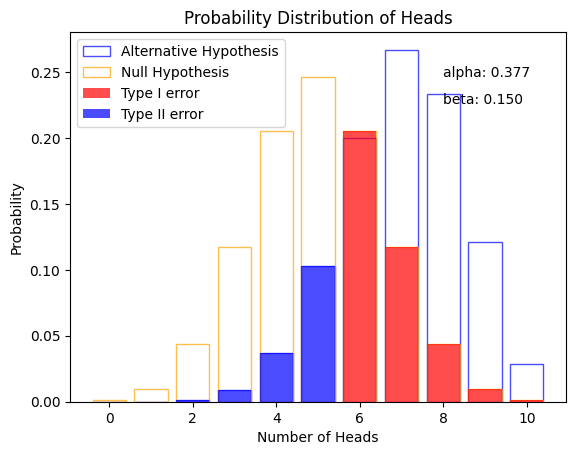

In [13]:
fig, ax = plt.subplots()
plot_experiment(10,0.5,0.7,6,ax,legend_off=False) # setting 7 as a critical value

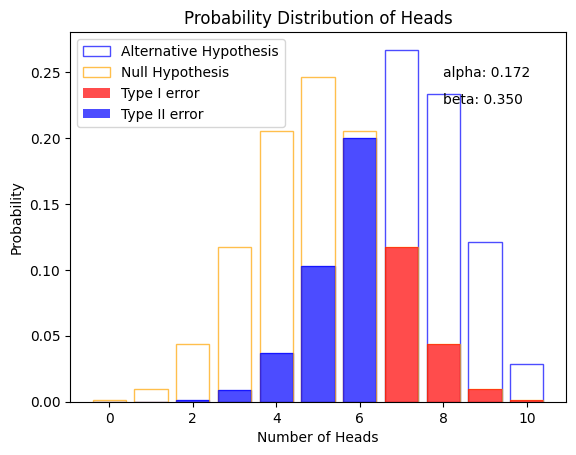

In [14]:
fig, ax = plt.subplots()
plot_experiment(10,0.5,0.7,7,ax, legend_off=False) # setting 7 as a critical value

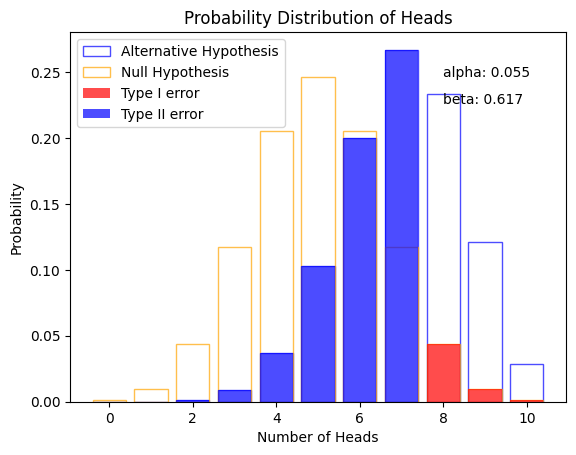

In [15]:
fig, ax = plt.subplots()
plot_experiment(10,0.5,0.7,8,ax, legend_off=False) # setting 7 as a critical value # setting 8 as a critical value

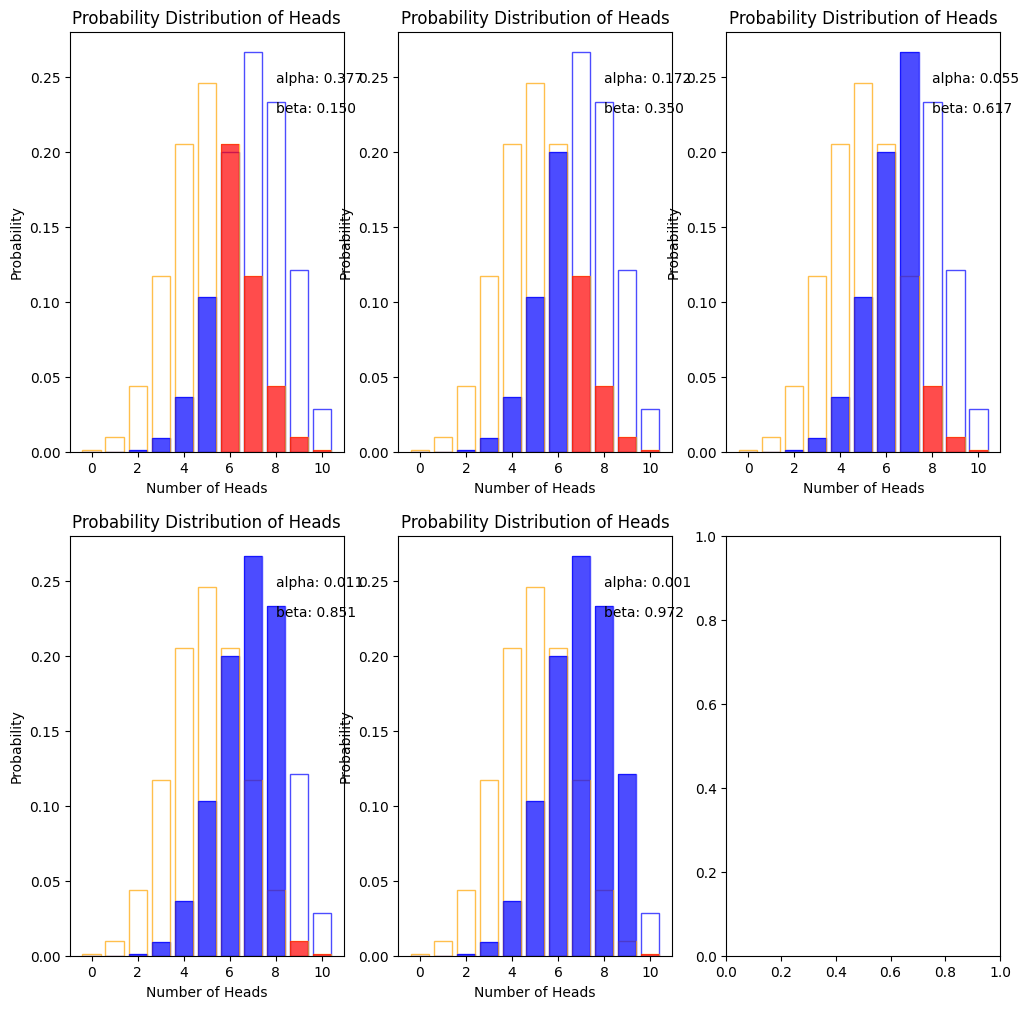

In [16]:
fig, axs = plt.subplots(2,3, figsize = (12,12))
for i in range(5):
  plot_experiment(10,0.5,0.7,i+6,axs[i//3,i%3])

## Decreasing the Probability of a Type II Error $β$ Without Increasing the Probability of a Type I Error $\alpha$ ?
The previous example shows that decreasing the probability of a Type I error leads to an increase in the probability of a Type II error, and vice versa.  How probability of a Type I error be held at some (preferably small level) while decreasing the probability of a Type II error?  The next series of graphs show that this can be done by using a larger n, that is by increasing the number of coin tosses.  An increase in n can be viewed as increasing the sample size for the experiment.  In the middle graph of the series of five graphs shown above, the probability of a Type I error, alpha, is approximately 0.05.  Suppose the coin was tossed 30 times instead of 10 times.  With 30 tosses you would want the critical value to be some number greater than 15.  Suppose that 20 is used as the critical value, that is, if 20 or more heads occur in the 30 tosses you would reject the null hypothesis that the coin is fair and accept the alternative hypothesis that the coin is biased in favor of heads (in this situation, we are looking at the alternative that the probability of a head is p=0.7).  The next graph displays the results with the probability distribution of the number of heads under the assumption that the null hypothesis is true shown in red, and the probability distribution of the number of heads under the assumption that the null hypothesis is false (and the probability of a head is 0.7) is displayed in blue.



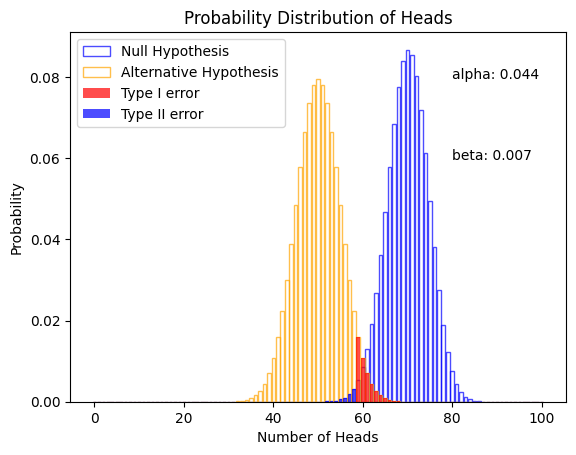

In [ ]:
fig, ax = plt.subplots()
plot_experiment(100,0.5,0.7,59,ax, legend_off=False) # setting 7 as a critical value # setting 8 as a critical value

# P-value approach to hypothesis testing

For now, go back to the coin tossing experiment where the null hypothesis is that the coin is fair (p=0.5) and the alternative hypothesis is that the coin is biased in favor of heads (p>0.5).  Suppose the coin is tossed 10 times and 8 heads are observed.  Since the alternative hypothesis is p>0.5, more extreme values are numbers of heads closer to 10.  So, to compute the p-value in this situation, you need only compute the probability of 8 or more heads in 10 tosses assuming the coin is fair.  But, the number of heads in 10 tosses of a coin assuming that the coin is fair has a binomial distribution with n=10 and p=0.5.  The p-value is P[8 heads] + P[9 heads] + P[10 heads].  From the binomial probability distribution, P[8 heads]=0.044, P[9 heads]=0.01, and P[10 heads]=0.001.  Thus the p-value is 0.044+0.010+0.001=0.055.

Now that the p-value is computed, how do you decide whether to accept or reject the null hypothesis?  Since the p-value is simply the probability of getting the observed number of heads under the assumption that the null hypothesis is true, if this probability is small, it is unlikely that the null hypothesis is true.  So 'small' p-values lead to rejection of the null hypothesis.  But 'small' is not defined.  The definition of small is up to the reader--if in the opinion of the reader, the p-value is small, the null hypothesis is rejected, while larger values would cause the null hypothesis to be accepted.  In statistical practice, 'small' values are usually 0.10, 0.05, or 0.01.  In the coin tosses above, the p-value is 0.055, and if a 'small' p-value for you is 0.05, you would fail to reject the null hypothesis, that is, you would say 8 heads in 10 tosses is not enough evidence to conclude that the coin is not fair.


## One-tailed or two-tailed test

In each of the coin tests shown above, the null hypotheses was H0: coin is fair (p=0.5) and the alternative hypothesis was Ha: coin is biased toward heads (p>0.5).   With these hypotheses the null hypothesis would only rejected if the number of heads in 10 coin tosses was some number greater than 5.  For example, you might reject the null only if you observe 9 or 10 heads in the 10 tosses.  The 'rejection region' (shown as the red bars in the above graphs) lies in the right tail of the distribution of the number of heads in 10 tosses of a fair coin.  This is a one-tail rejection region or one-tail test.  Note that the 'greater than' symbol (>) in Ha points toward the rejection region.

If you were testing H0: coin is fair (p=0.5) against the alternative hypothesis Ha: coin is biased toward tails (p<0.5), you would only reject the null hypothesis in favor of the alternative hypothesis if the number of heads was some number less than 5.  For example, you might decide to reject H0 and accept Ha if the number of heads was 2 or fewer.  Then the rejection region would lie in the left-hand tail of the probability distribution.  This is again a one-tail test.  The 'less than' symbol (<) points toward the rejection region.


On the other hand if you were testing H0: coin is fair (p=0.5) against the alternative hypothesis Ha: coin is not fair (p not equal to 0.5), you would reject the null hypothesis in favor of the alternative hypothesis if the number of heads was some number much less than 5 or some number much greater than 5.  For example, you might decide to reject H0 and accept Ha if the number of heads was 2 or fewer or 8 or more.  Then the rejection region would lie in both tails of the probability distribution of the number of heads.  This is shown by the shaded portion of the next graph.  This is a two-tail test with rejection regions in both tails.


Text(0.5, 1.0, 'Probability Distribution of Heads')

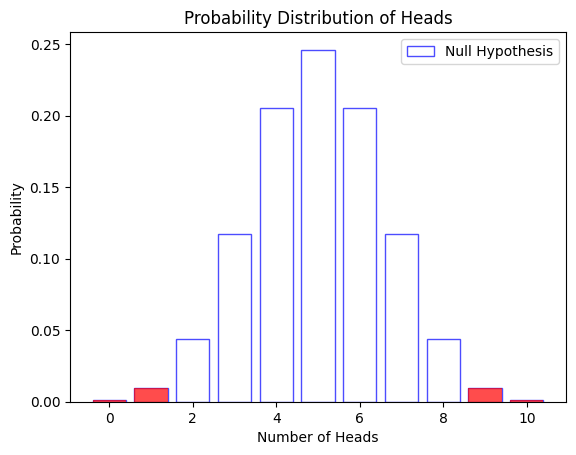

In [19]:
critical_value = 9
critical_value_range = list(range(critical_value,n+1))
critical_value_range_tail = list(range(n+1-critical_value))
critical_values_pmf_h0 = [binom.pmf(r, n, p0) for r in critical_value_range]
critical_values_pmf_h0_tail = [binom.pmf(r, n, p0) for r in critical_value_range_tail]
plt.bar(r_values, dist0, label="Null Hypothesis", alpha=0.7, facecolor="none", edgecolor='blue')
plt.bar(critical_value_range, critical_values_pmf_h0, alpha=0.7, color = 'red')
plt.bar(critical_value_range_tail,critical_values_pmf_h0_tail, alpha=0.7, color = 'red')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()
plt.title('Probability Distribution of Heads')

In [18]:
calc_alpha(10,0.5,9)

0.0107421875

In [ ]:
# see if you can amend calc_alpha to take the arg one-t or two-t and then calculate the correct alpha

## Specific Hypothesis Tests

### Summary of the p-value method

* Determine the null and alternative hypotheses
* Determine the test statistic
* Take a random sample of size n and compute the value of the test statistic
* Determine the probability of observed value or something more extreme than the observed value of the test statistic (more extreme is based on the null and alternative hypotheses).  This is the p-value.
* Reject the null hypothesis if the p-value is 'small.'  (Where a significance level is give for the test, 'small' is usually meant to be any p-value less than or equal to the significance level)



### For a population mean with known population standard deviation
* Assumptions:

(1) Sample is random

(2) If the sample is small (n<30), the population is normal or close to normal.

* Test statistic:   
$z= \frac{\bar{x}-\mu}{σ/\sqrt{n}}$


### For a population mean with unknown population standard deviation
Assumptions:

(1) Sample is random

(2) If the sample is small (n<30), the population is normal.

Small Sample (n<30) Test Statistic:    

$t= \frac{\bar{x}-\mu}{s/\sqrt{n}}$

where t has a Student's t-distribution with n-1 degrees of freedom.

Large Sample (n 30 or more) Test Statistic: $z= \frac{\bar{x}-\mu}{s/\sqrt{n}}$
  

Referced material from: https://www.csus.edu/indiv/j/jgehrman/courses/stat50/hypthesistests/9hyptest.htm